In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats

In [4]:
data = pd.read_csv('AirQualityUCI.csv')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,10/03/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,10/03/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,10/03/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,10/03/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [5]:
data['datetime'] = data['Date'] + ' ' + data['Time']

In [6]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [7]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
0,10/03/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,2004-10-03 18:00:00
1,10/03/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,2004-10-03 19:00:00
2,10/03/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,2004-10-03 20:00:00
3,10/03/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,2004-10-03 21:00:00
4,10/03/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,2004-10-03 22:00:00


In [8]:
import seaborn as sns

In [65]:
data.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
datetime         0
dtype: int64

In [66]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [69]:
times_gaps = data.datetime - data.datetime.shift(1)

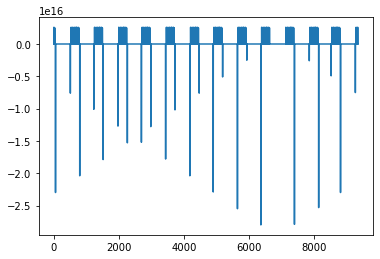

In [73]:
times_gaps.plot()

In [78]:
data.sort_values(by = 'datetime', inplace = True)

In [82]:
data.reset_index(drop = True, inplace = True)

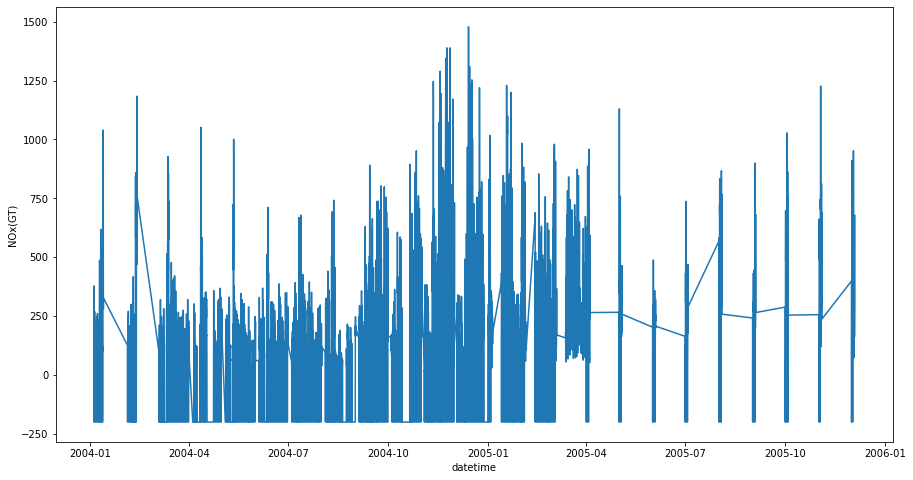

In [83]:
plt.figure(figsize = (15,8))
sns.lineplot(y = data['NOx(GT)'],x = data['datetime'])

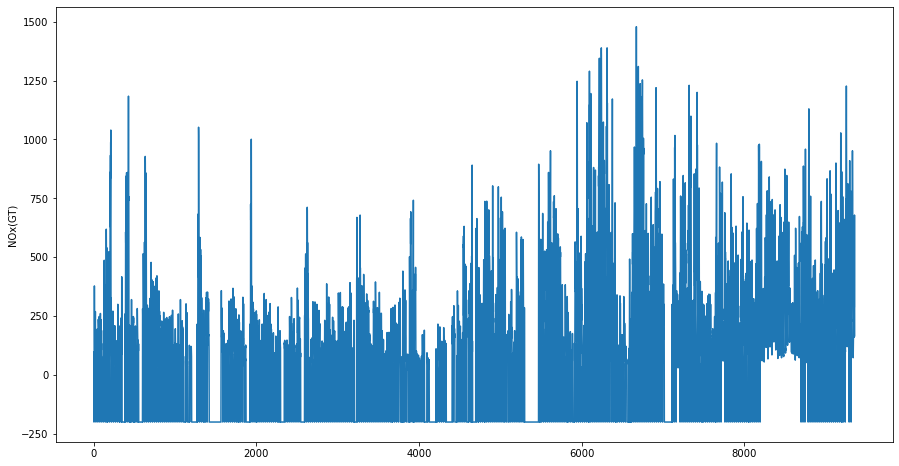

In [84]:
plt.figure(figsize = (15,8))

sns.lineplot(y = data['NOx(GT)'],x = data.index)

In [85]:
times_gaps = data.datetime - data.datetime.shift(1)

In [115]:
times_gaps[pd.isnull(times_gaps)]

0   NaT
Name: datetime, dtype: timedelta64[ns]

In [124]:
times_gaps[216]

Timedelta('22 days 01:00:00')

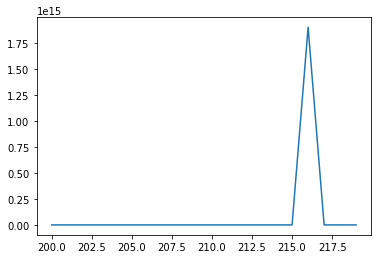

In [123]:
times_gaps[200:220].plot()

In [25]:
data.groupby('datetime').sum()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2004-01-04 00:00:00,1.6,1143,106,6.3,825,96,986,86,1477,978,12.0,61.6,0.8593
2004-01-04 01:00:00,1.2,1044,100,5.1,770,85,1031,70,1425,944,11.5,63.9,0.8652
2004-01-04 02:00:00,1.1,1034,71,4.1,716,50,1085,55,1405,891,10.7,67.2,0.8630
2004-01-04 03:00:00,0.9,956,72,4.0,713,-200,1099,-200,1422,849,9.0,73.1,0.8394
2004-01-04 04:00:00,0.7,909,44,2.4,615,57,1237,49,1322,790,10.2,66.6,0.8299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-12-03 19:00:00,0.8,1177,-200,7.5,878,289,641,152,1224,844,14.0,47.8,0.7582
2005-12-03 20:00:00,2.4,1383,-200,14.1,1119,550,522,201,1415,1310,13.2,51.4,0.7760
2005-12-03 21:00:00,3.3,1363,-200,12.4,1064,679,536,221,1350,1353,12.0,56.1,0.7832


### this time series data is not continuos

#### So taking the data till first discontinuity i.e at 216th row

In [473]:
new_data = data.iloc[:216]

In [474]:
new_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetime
0,01/04/2004,00:00:00,1.6,1143,106,6.3,825,96,986,86,1477,978,12.0,61.6,0.8593,2004-01-04 00:00:00
1,01/04/2004,01:00:00,1.2,1044,100,5.1,770,85,1031,70,1425,944,11.5,63.9,0.8652,2004-01-04 01:00:00
2,01/04/2004,02:00:00,1.1,1034,71,4.1,716,50,1085,55,1405,891,10.7,67.2,0.8630,2004-01-04 02:00:00
3,01/04/2004,03:00:00,0.9,956,72,4.0,713,-200,1099,-200,1422,849,9.0,73.1,0.8394,2004-01-04 03:00:00
4,01/04/2004,04:00:00,0.7,909,44,2.4,615,57,1237,49,1322,790,10.2,66.6,0.8299,2004-01-04 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,01/12/2004,19:00:00,3.0,1124,-200,11.9,1047,401,1401,126,1419,1193,12.5,72.6,1.0489,2004-01-12 19:00:00
212,01/12/2004,20:00:00,2.6,1090,-200,10.1,981,279,1513,113,1390,1044,11.8,76.1,1.0544,2004-01-12 20:00:00
213,01/12/2004,21:00:00,2.1,1034,-200,7.2,865,280,1732,111,1280,925,11.3,79.9,1.0697,2004-01-12 21:00:00
214,01/12/2004,22:00:00,1.8,1040,-200,7.1,859,280,1705,107,1293,889,11.1,84.3,1.1137,2004-01-12 22:00:00


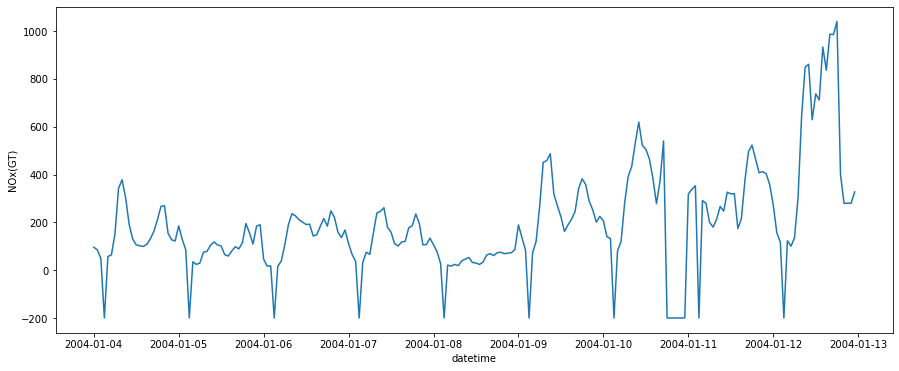

In [475]:
plt.figure(figsize = (15,6))
sns.lineplot(x = new_data['datetime'], y = new_data['NOx(GT)'])

## Doing the analysis for 216 data points for the feature 'NOx(GT)', 'CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NO2(GT)'

In [476]:
df = pd.DataFrame()
df['datetime'] = new_data['datetime'].copy()
df['x1'] = new_data['NOx(GT)'].copy()
df['x2'] = new_data['CO(GT)'].copy()
df['x3'] = new_data['NMHC(GT)'].copy()
df['x4'] = new_data['C6H6(GT)'].copy()
df['x5'] = new_data['NO2(GT)'].copy()

In [477]:
df.head()

,datetime,x1,x2,x3,x4,x5
0,2004-01-04 00:00:00,96,1.6,106,6.3,86
1,2004-01-04 01:00:00,85,1.2,100,5.1,70
2,2004-01-04 02:00:00,50,1.1,71,4.1,55
3,2004-01-04 03:00:00,-200,0.9,72,4.0,-200
4,2004-01-04 04:00:00,57,0.7,44,2.4,49


## Data Alignment

In [478]:
# Taking 04/01/2004 00:00:00 as the starting point
time_gap = df['datetime'] - df['datetime'][0]

In [479]:
df['time'] = time_gap

In [480]:
df.head()

,datetime,x1,x2,x3,x4,x5,time
0,2004-01-04 00:00:00,96,1.6,106,6.3,86,00:00:00
1,2004-01-04 01:00:00,85,1.2,100,5.1,70,01:00:00
2,2004-01-04 02:00:00,50,1.1,71,4.1,55,02:00:00
3,2004-01-04 03:00:00,-200,0.9,72,4.0,-200,03:00:00
4,2004-01-04 04:00:00,57,0.7,44,2.4,49,04:00:00


In [481]:
df.sort_values(by  = 'time', inplace = True)

In [482]:
df.reset_index(inplace = True)

In [483]:
df.rename({'index':'x'}, axis = 1, inplace = True)

In [484]:
df.drop(['datetime', 'time'], axis = 1, inplace =True)

In [485]:
df.head()

,x,x1,x2,x3,x4,x5
0,0,96,1.6,106,6.3,86
1,1,85,1.2,100,5.1,70
2,2,50,1.1,71,4.1,55
3,3,-200,0.9,72,4.0,-200
4,4,57,0.7,44,2.4,49


# PLOTS


In [486]:
plot_df = df.copy()

### x is the indexing variable
### x1,x2,x3,x4,x5 are the 5 features taken into consideration.

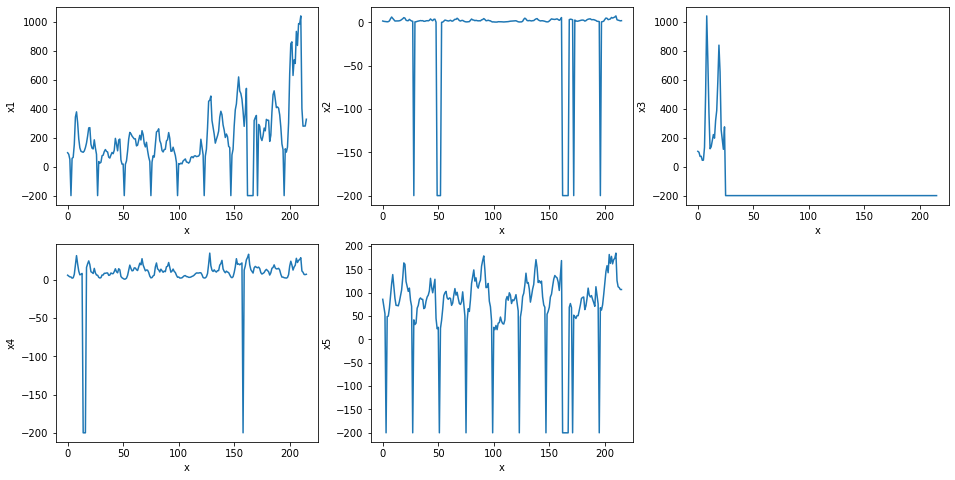

In [580]:
plt.figure(figsize = (16,8))
plt.subplot(2,3,1)
sns.lineplot(x = plot_df['x'], y = plot_df['x1'])
plt.subplot(2,3,2)
sns.lineplot(x = plot_df['x'], y = plot_df['x2'])
plt.subplot(2,3,3)
sns.lineplot(x = plot_df['x'], y = plot_df['x3'])
plt.subplot(2,3,4)
sns.lineplot(x = plot_df['x'], y = plot_df['x4'])
plt.subplot(2,3,5)
sns.lineplot(x = plot_df['x'], y = plot_df['x5'])

<center> <H1> Grubb's Test for Outlier Detection </H1> </center>

\begin{equation}
\begin{array}{l}{\text { Grubbs' test is defined for the hypothesis: }} \\ {\begin{array}{ll}{\text { Ho: }} & {\text { There are no outliers in the data set }} \\ {\mathrm{H}_{\mathrm{a}} :} & {\text { There is exactly one outlier in the data set }}\end{array}}\end{array}
\end{equation}

\begin{equation}
\begin{array}{l}{\text {The Grubbs' test statistic is defined as: }} \\ {\qquad G_{calculated}=\frac{\max \left|Y_{i}-\overline{Y}\right|}{s}} \\ {\text { with } \overline{Y} \text { and } s \text { denoting the sample mean and standard deviation, respectively. The }} \\ {\text { Grubbs' test statistic is the largest absolute deviation from the sample mean in units of }} \\ {\text { the sample standard deviation. }}\end{array}
\end{equation}

\begin{equation}
G_{critical}=\frac{(N-1)}{\sqrt{N}} \sqrt{\frac{\left(t_{\alpha /(2 N), N-2}\right)^{2}}{N-2+\left(t_{\alpha /(2 N), N-2}\right)^{2}}}
\end{equation}

<center> <H1> Critical Value Calculation </H1> </center>

\begin{equation}
\begin{array}{l}\\ {\qquad G_{calculated}=\frac{\max \left|Y_{i}-\overline{Y}\right|}{s}}\end{array} \end{equation}

\begin{equation}
G_{critical}=\frac{(N-1)}{\sqrt{N}} \sqrt{\frac{\left(t_{\alpha /(2 N), N-2}\right)^{2}}{N-2+\left(t_{\alpha /(2 N), N-2}\right)^{2}}}
\end{equation}

In [488]:
# Calculated Grubbs value

def grubbs_stat(y): 
    ''' Arguments:
            y - numpy array of which outlier is to be detected.'''
    
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations/ std_dev
    print("Grubbs Statistics Value : {}".format(Gcal))
    return Gcal, max_ind

In [489]:
# Critical value 

def calculate_critical_value(size, alpha):
    ''' Arguments:
            size - size of the numpy array.
            aplha - the confidence interval choosen.'''
    
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

In [490]:
# Checking if outlier present

def check_G_values(Gs, Gc, inp, max_index):
    ''' Arguments:
            Gs - Grubbs statistic value or the calculated value.
            Gc - Grubbs critical value.
            inp - input numpy array.
            max_index - the index of the element with maximum deviation.'''
    
    if Gs > Gc:
        print('{} is an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))
        return True
    else:
        print('{} is not an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))
        return False

In [538]:
# Running Grubbs test

def ESD_Test(input_series, alpha, max_outliers = np.inf):
    ''' Arguments:
            input_series - input pandas dataframe.
            alpha - desired confidence interval.
            max_outliers - maximum number of outliers to delete {default: Till no outlier}'''
    outliers_list = pd.DataFrame(columns = input_series.columns)
    for j in input_series.columns:
        i = 0
        while (i < max_outliers):
            Gcritical = calculate_critical_value(input_series.shape[0], alpha)
            Gstat, max_index = grubbs_stat(input_series[j].to_numpy())
            if check_G_values(Gstat, Gcritical, input_series.to_numpy(), max_index):
                outliers_list = outliers_list.append(input_series.iloc[max_index])
                input_series.drop(input_series.index[max_index], inplace =True)
            else:
                break
            i += 1
    return outliers_list

In [492]:
df_store = df.copy()

In [539]:
df = df_store.copy()

In [540]:
df_95 = df_store.copy()

In [541]:
out_list_95 = ESD_Test(df_95,0.95)

Grubbs Critical Value: 2.8245758514317103
Grubbs Statistics Value : 1.7240505301222313
[  0.   96.    1.6 106.    6.3  86. ] is not an outlier. G > G-critical: 1.7241 > 2.8246 

Grubbs Critical Value: 2.8245758514317103
Grubbs Statistics Value : 3.853414660665473
[ 210.  1040.     7.5 -200.    29.2  185. ] is an outlier. G > G-critical: 3.8534 > 2.8246 

Grubbs Critical Value: 2.8230290355643195
Grubbs Statistics Value : 3.7527547700108723
[ 208.   987.     5.6 -200.    25.7  171. ] is an outlier. G > G-critical: 3.7528 > 2.8230 

Grubbs Critical Value: 2.8214741929064506
Grubbs Statistics Value : 3.8819979479307016
[ 209.   985.     6.2 -200.    26.8  174. ] is an outlier. G > G-critical: 3.8820 > 2.8215 

Grubbs Critical Value: 2.81991124341955
Grubbs Statistics Value : 3.7741466535542205
[ 206.   933.     5.7 -200.    28.4  178. ] is an outlier. G > G-critical: 3.7741 > 2.8199 

Grubbs Critical Value: 2.8183401058839364
Grubbs Statistics Value : 3.5416659245919186
[ 202.   861.     

Grubbs Critical Value: 2.722828979526524
Grubbs Statistics Value : 2.319836646062094
[  91.   235.     4.4 -200.    22.9  179. ] is not an outlier. G > G-critical: 2.3198 > 2.7228 

Grubbs Critical Value: 2.722828979526524
Grubbs Statistics Value : 4.1392161083177
[  27.  -200.     1.3 -200.     6.3 -200. ] is an outlier. G > G-critical: 4.1392 > 2.7228 

Grubbs Critical Value: 2.7206653105658054
Grubbs Statistics Value : 4.3957963966515585
[  75.  -200.     0.6 -200.     2.8 -200. ] is an outlier. G > G-critical: 4.3958 > 2.7207 

Grubbs Critical Value: 2.718486377263358
Grubbs Statistics Value : 4.706888954446089
[  99.  -200.     0.5 -200.     3.6 -200. ] is an outlier. G > G-critical: 4.7069 > 2.7185 

Grubbs Critical Value: 2.7162919729221904
Grubbs Statistics Value : 5.095006658848421
[ 123.  -200.     0.5 -200.     2.6 -200. ] is an outlier. G > G-critical: 5.0950 > 2.7163 

Grubbs Critical Value: 2.7140818867010927
Grubbs Statistics Value : 5.598279624485618
[ 147.  -200.     0

<ipython-input-488-3cab251117d5>:12: RuntimeWarning: invalid value encountered in double_scalars
  Gcal = max_of_deviations/ std_dev


In [542]:
out_list = ESD_Test(df,0.90)

Grubbs Critical Value: 2.841272786317424
Grubbs Statistics Value : 1.7240505301222313
[  0.   96.    1.6 106.    6.3  86. ] is not an outlier. G > G-critical: 1.7241 > 2.8413 

Grubbs Critical Value: 2.841272786317424
Grubbs Statistics Value : 3.853414660665473
[ 210.  1040.     7.5 -200.    29.2  185. ] is an outlier. G > G-critical: 3.8534 > 2.8413 

Grubbs Critical Value: 2.8397315255472364
Grubbs Statistics Value : 3.7527547700108723
[ 208.   987.     5.6 -200.    25.7  171. ] is an outlier. G > G-critical: 3.7528 > 2.8397 

Grubbs Critical Value: 2.83818226591851
Grubbs Statistics Value : 3.8819979479307016
[ 209.   985.     6.2 -200.    26.8  174. ] is an outlier. G > G-critical: 3.8820 > 2.8382 

Grubbs Critical Value: 2.8366249276561737
Grubbs Statistics Value : 3.7741466535542205
[ 206.   933.     5.7 -200.    28.4  178. ] is an outlier. G > G-critical: 3.7741 > 2.8366 

Grubbs Critical Value: 2.8350594298077696
Grubbs Statistics Value : 3.5416659245919186
[ 202.   861.     4.

[ 152.   433.     4.1 -200.    27.9   97. ] is an outlier. G > G-critical: 3.0295 > 2.7504 

Grubbs Critical Value: 2.7483648751490173
Grubbs Statistics Value : 2.724750240953145
[ 139.   358.     4.4 -200.    25.7  154. ] is not an outlier. G > G-critical: 2.7248 > 2.7484 

Grubbs Critical Value: 2.7483648751490173
Grubbs Statistics Value : 4.169447276132551
[  27.  -200.     1.3 -200.     6.3 -200. ] is an outlier. G > G-critical: 4.1694 > 2.7484 

Grubbs Critical Value: 2.746267737265732
Grubbs Statistics Value : 4.42482699765869
[  75.  -200.     0.6 -200.     2.8 -200. ] is an outlier. G > G-critical: 4.4248 > 2.7463 

Grubbs Critical Value: 2.7441561710326643
Grubbs Statistics Value : 4.733727188812829
[  99.  -200.     0.5 -200.     3.6 -200. ] is an outlier. G > G-critical: 4.7337 > 2.7442 

Grubbs Critical Value: 2.742029985890101
Grubbs Statistics Value : 5.117901495991976
[ 123.  -200.     0.5 -200.     2.6 -200. ] is an outlier. G > G-critical: 5.1179 > 2.7420 

Grubbs Crit

<ipython-input-488-3cab251117d5>:12: RuntimeWarning: invalid value encountered in double_scalars
  Gcal = max_of_deviations/ std_dev


In [509]:
len(df_95)

152

In [510]:
len(df)

156

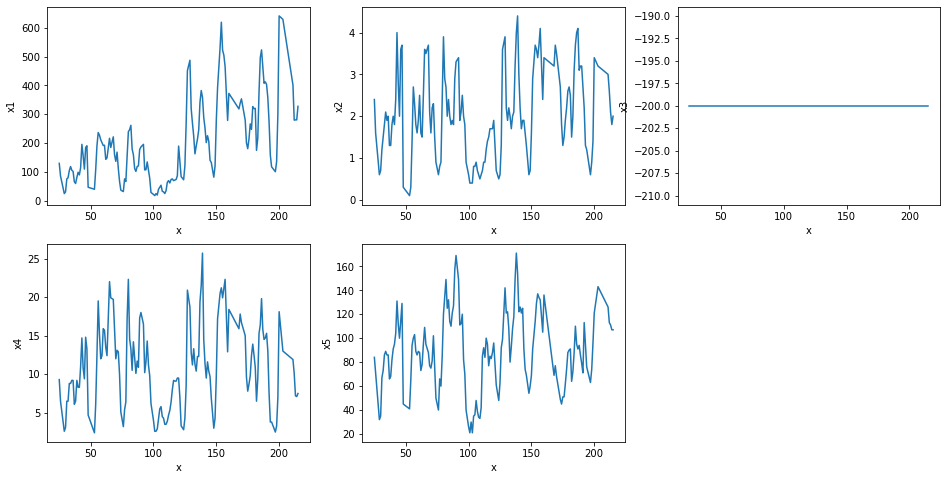

In [511]:
#Plot after removing outliers with 90% confidence interval
plt.figure(figsize = (16,8))
plt.subplot(2,3,1)
sns.lineplot(x = df['x'], y = df['x1'])
plt.subplot(2,3,2)
sns.lineplot(x = df['x'], y = df['x2'])
plt.subplot(2,3,3)
sns.lineplot(x = df['x'], y = df['x3'])
plt.subplot(2,3,4)
sns.lineplot(x = df['x'], y = df['x4'])
plt.subplot(2,3,5)
sns.lineplot(x = df['x'], y = df['x5'])

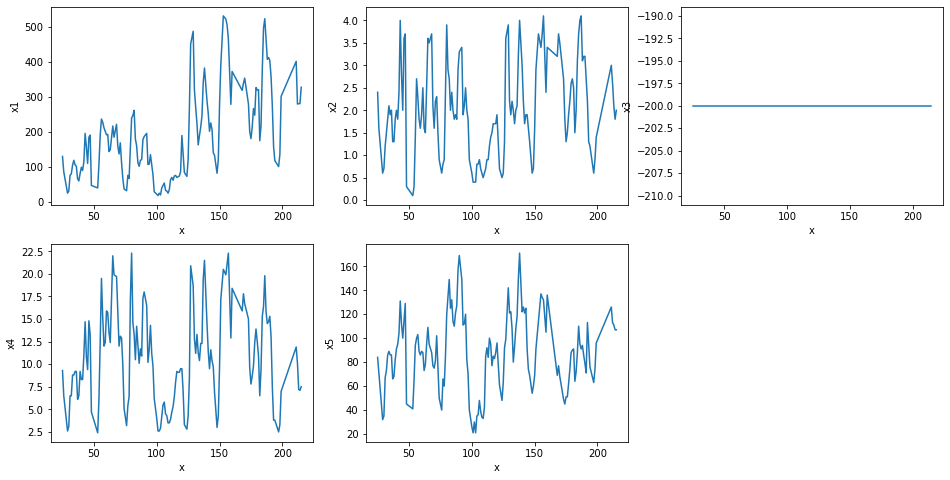

In [512]:
#Plot after removing outliers with 95% confidence interval
plt.figure(figsize = (16,8))
plt.subplot(2,3,1)
sns.lineplot(x = df_95['x'], y = df_95['x1'])
plt.subplot(2,3,2)
sns.lineplot(x = df_95['x'], y = df_95['x2'])
plt.subplot(2,3,3)
sns.lineplot(x = df_95['x'], y = df_95['x3'])
plt.subplot(2,3,4)
sns.lineplot(x = df_95['x'], y = df_95['x4'])
plt.subplot(2,3,5)
sns.lineplot(x = df_95['x'], y = df_95['x5'])

# Fuzzy Clustering with weighted coefficients

### The weighted coefficient can be worked out viamembership function. 
###  Normal distribution membership function:
\begin{equation}
u_{i} = \exp{(-\frac{x_{i} - a}{b}^{2})}
\end{equation}

### Notation a is the center of universe of discourse, b is standard deviation of the random data.

In [441]:
# Membership function

def member_fun(x, mean, stdev):
    return np.exp(-((x-mean)/stdev)**2)

### All the probability should be normalized to produce weighted coefficient. Now the aggregated result y can be calculated by:
\begin{equation}
y = \sum \limits_{i=1}^{n}{\frac{u_{i}}{u_{1} + u_{2} + ... + u_{n} } x_{i}}
\end{equation}

### Sum of the weighted coefficients is one

In [442]:
# Result y value

def y_val(x):
    y = [0 for i in range(len(x))]
    mean = [np.mean(x[:,j]) for j in range(5)]
    stdev = [np.std(x[:,j]) for j in range(5)]
    
    for i in range(len(x)):
        ui = [0 for i in range(5)]
        for j in range(5):
            ui[j] = member_fun(x[i,j], mean[j],stdev[j])
#         y[i] = np.sum([(member_fun(x[i,j],means[j],stdev[j])*x[i,j])/
#                        np.sum([member_fun(x[i,k],means[k],stdev[k]) for k in range(5)]) for j in range(5)])
        ut = np.sum([ui[j] for j in range(len(ui)) if np.isnan(ui[j]) == False])
        y[i] = np.sum([(ui[j]*x[i,j])/ut for j in range(len(ui)) if np.isnan(ui[j]) == False])
        #print (y[i],[(ui[j]*x[i,j])/ut for j in range(5) if np.isnan(ui[j])==False],ut)
        #print (ui,ut,np.sum([ui[j]/ut for j in range(5) if np.isnan(ui[j]) == False]))
    return y

In [514]:
test = df_store.to_numpy()

In [515]:
y_res = y_val(test)

In [546]:
test_95 = df_95.drop('x', axis = 1).to_numpy()
y_res_95 = y_val(test_95)
test_90 = df.drop('x', axis = 1).to_numpy()
y_res_90 = y_val(test_90)

<ipython-input-441-a6cb78e2480e>:4: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(-((x-mean)/stdev)**2)


In [547]:
test_out_95 = out_list_95.drop('x', axis = 1).to_numpy()
y_res_out_95 = y_val(test_out_95)
test_out_90 = out_list.drop('x', axis = 1).to_numpy()
y_res_out_90 = y_val(test_out_90)

In [548]:
df.index

Int64Index([ 25,  26,  29,  30,  31,  32,  33,  34,  35,  36,
            ...
            197, 198, 199, 200, 203, 211, 212, 213, 214, 215],
           dtype='int64', length=156)

In [549]:
df_95.index

Int64Index([ 25,  26,  29,  30,  31,  32,  33,  34,  35,  36,
            ...
            193, 194, 197, 198, 199, 211, 212, 213, 214, 215],
           dtype='int64', length=152)

### Plot for 90% confidence interval

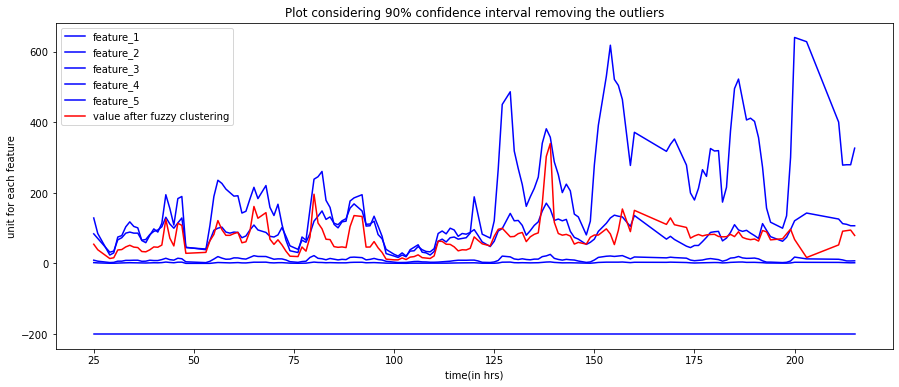

In [597]:
plt.figure(figsize = (15,6))
plt.plot(df['x'],df['x1'],'b', label = 'feature_1')
plt.plot(df['x'],df['x2'],'b', label = 'feature_2')
plt.plot(df['x'],df['x3'],'b', label = 'feature_3')
plt.plot(df['x'],df['x4'],'b', label = 'feature_4')
plt.plot(df['x'],df['x5'],'b', label = 'feature_5')
plt.plot(df['x'], y_res_90, 'r', label = 'value after fuzzy clustering')
plt.xlabel('time(in hrs)')
plt.ylabel('unit for each feature')
plt.legend()
plt.title('Plot considering 90% confidence interval removing the outliers')
plt.show()

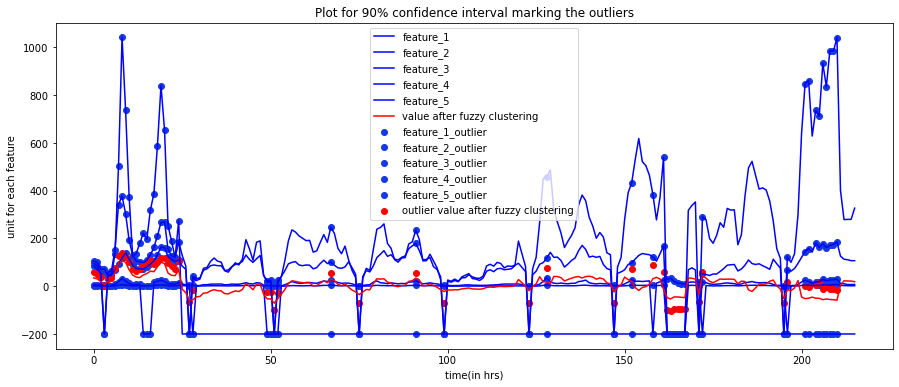

In [598]:
plt.figure(figsize = (15,6))
plt.plot(df_store['x'],df_store['x1'],'b', label = 'feature_1')
plt.plot(df_store['x'],df_store['x2'],'b', label = 'feature_2')
plt.plot(df_store['x'],df_store['x3'],'b', label = 'feature_3')
plt.plot(df_store['x'],df_store['x4'],'b', label = 'feature_4')
plt.plot(df_store['x'],df_store['x5'],'b', label = 'feature_5')
plt.plot(df_store['x'], y_res, 'r', label = 'value after fuzzy clustering')
plt.scatter(out_list['x'],out_list['x1'], color = '#163adf', label = 'feature_1_outlier')
plt.scatter(out_list['x'],out_list['x2'], color = '#163adf', label = 'feature_2_outlier')
plt.scatter(out_list['x'],out_list['x3'], color = '#163adf', label = 'feature_3_outlier')
plt.scatter(out_list['x'],out_list['x4'], color = '#163adf', label = 'feature_4_outlier')
plt.scatter(out_list['x'],out_list['x5'], color = '#163adf', label = 'feature_5_outlier')
plt.scatter(out_list['x'], y_res_out_90, color = 'red', label = 'outlier value after fuzzy clustering')
plt.xlabel('time(in hrs)')
plt.ylabel('unit for each feature')
plt.legend()
plt.title('Plot for 90% confidence interval marking the outliers')
plt.show()

### Plot for 95% confidence interval

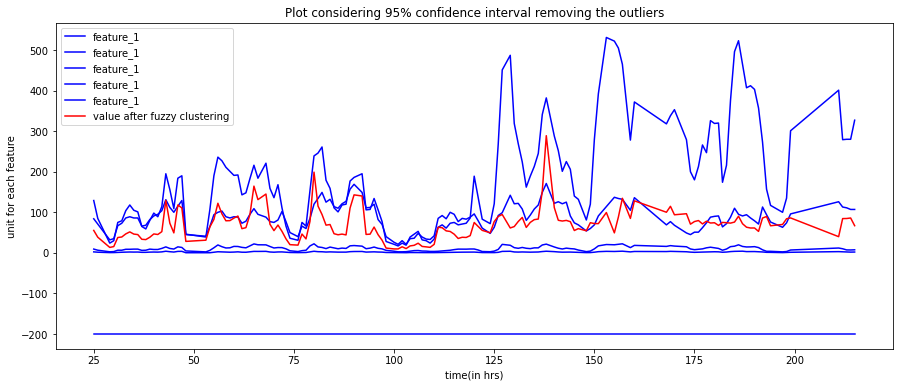

In [599]:
plt.figure(figsize = (15,6))
plt.plot(df_95['x'],df_95['x1'],'b', label = 'feature_1')
plt.plot(df_95['x'],df_95['x2'],'b', label = 'feature_1')
plt.plot(df_95['x'],df_95['x3'],'b', label = 'feature_1')
plt.plot(df_95['x'],df_95['x4'],'b', label = 'feature_1')
plt.plot(df_95['x'],df_95['x5'],'b', label = 'feature_1')
plt.plot(df_95['x'], y_res_95, 'r', label = 'value after fuzzy clustering')
plt.xlabel('time(in hrs)')
plt.ylabel('unit for each feature')
plt.legend()
plt.title('Plot considering 95% confidence interval removing the outliers')
plt.show()

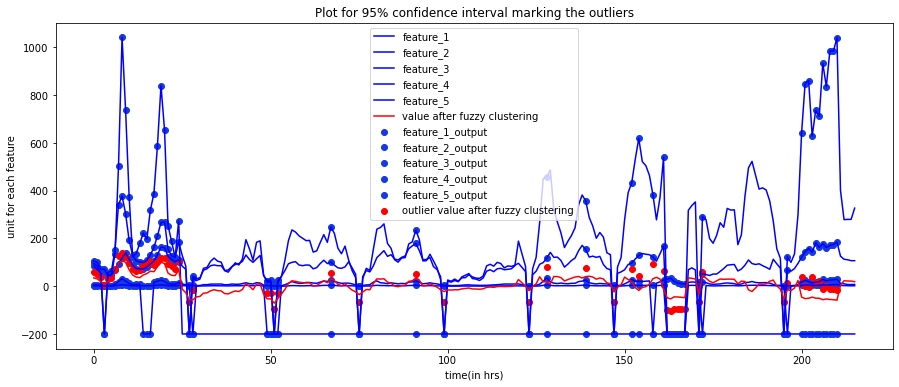

In [600]:
plt.figure(figsize = (15,6))
plt.plot(df_store['x'],df_store['x1'],'b', label = 'feature_1')
plt.plot(df_store['x'],df_store['x2'],'b', label = 'feature_2')
plt.plot(df_store['x'],df_store['x3'],'b', label = 'feature_3')
plt.plot(df_store['x'],df_store['x4'],'b', label = 'feature_4')
plt.plot(df_store['x'],df_store['x5'],'b', label = 'feature_5')
plt.plot(df_store['x'], y_res, 'r', label = 'value after fuzzy clustering')
plt.scatter(out_list_95['x'],out_list_95['x1'], color = '#163adf', label = 'feature_1_output')
plt.scatter(out_list_95['x'],out_list_95['x2'], color = '#163adf', label = 'feature_2_output')
plt.scatter(out_list_95['x'],out_list_95['x3'], color = '#163adf', label = 'feature_3_output')
plt.scatter(out_list_95['x'],out_list_95['x4'], color = '#163adf', label = 'feature_4_output')
plt.scatter(out_list_95['x'],out_list_95['x5'], color = '#163adf', label = 'feature_5_output')
plt.scatter(out_list_95['x'], y_res_out_95, color = 'red', label = 'outlier value after fuzzy clustering')
plt.xlabel('time(in hrs)')
plt.ylabel('unit for each feature')
plt.legend()
plt.title('Plot for 95% confidence interval marking the outliers')
plt.show()

### Feature x3 had a constant value of -200 over the time period, so the weight in fuzzy clustering is 0 assigned for this feature x3